# Analysis of 5 Algorithms without performing one hot encoding on the dataset

In [26]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, auc, precision_recall_curve, roc_curve
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

In [27]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [28]:
import tensorflow as tf
tf.test.is_built_with_cuda()
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


# RNN

In [29]:
# Load the dataset
df = pd.read_csv('bank_fraud_dataset_label_encoding.csv')

print(df.columns)

Index(['customer', 'merchant', 'category', 'amount', 'fraud'], dtype='object')


In [30]:
from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping()
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=10, 
    min_delta=0.001, 
    mode='max'
)

In [31]:
import tensorflow as tf
with tf.device('/device:GPU:0'):
    # Split the data into training, validation, and testing sets
    X_train_val, X_test, y_train_val, y_test = train_test_split(df.drop('fraud', axis=1), df['fraud'], test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

    # Define the RNN model architecture
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Reshape((X_train.shape[1], 1)),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Display the model summary
    model.summary()

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[custom_early_stopping])

    # Evaluate the performance of the model on the test data
    y_pred_test = model.predict(X_test).flatten()
    y_pred_test = np.where(y_pred_test > 0.5, 1, 0)

    print("For Test Dataset")
    print('Accuracy:', accuracy_score(y_test, y_pred_test))
    print('Precision:', precision_score(y_test, y_pred_test))
    print('Recall:', recall_score(y_test, y_pred_test))
    print('F1-score:', f1_score(y_test, y_pred_test))
    print('ROC-AUC:', roc_auc_score(y_test, y_pred_test))
    print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_test))
    print("Classification Report:\n", classification_report(y_test, y_pred_test))

    # Evaluate the performance of the model on the validation data
    y_pred_val = model.predict(X_val).flatten()
    y_pred_val = np.where(y_pred_val > 0.5, 1, 0)

    print("For Validation Dataset")
    print('Accuracy:', accuracy_score(y_val, y_pred_val))
    print('Precision:', precision_score(y_val, y_pred_val))
    print('Recall:', recall_score(y_val, y_pred_val))
    print('F1-score:', f1_score(y_val, y_pred_val))
    print('ROC-AUC:', roc_auc_score(y_val, y_pred_val))
    print('Confusion matrix:\n', confusion_matrix(y_val, y_pred_val))
    print("Classification Report:\n", classification_report(y_val, y_pred_val))

    # Evaluate the performance of the model
    rnn_test_acc = accuracy_score(y_test, y_pred_test)
    rnn_test_prec = precision_score(y_test, y_pred_test)
    rnn_test_rec = recall_score(y_test, y_pred_test)
    rnn_test_f1 = f1_score(y_test, y_pred_test)
    rnn_test_roc = roc_auc_score(y_test, y_pred_test)

    rnn_val_acc = accuracy_score(y_val, y_pred_val)
    rnn_val_prec = precision_score(y_val, y_pred_val)
    rnn_val_rec = recall_score(y_val, y_pred_val)
    rnn_val_f1 = f1_score(y_val, y_pred_val)
    rnn_val_roc = roc_auc_score(y_val, y_pred_val)

    with open('LE RNN.txt', 'w') as f:
        print("\nRNN Performance on Test Data:", file=f)
        print("Accuracy:", rnn_test_acc, file=f)
        print("Precision:", rnn_test_prec, file=f)
        print("Recall:", rnn_test_rec, file=f)
        print("F1-score:", rnn_test_f1, file=f)
        print("ROC-AUC:", rnn_test_roc, file=f)

        print("\nRNN Performance on Validation Data:", file=f)
        print("Accuracy:", rnn_val_acc, file=f)
        print("Precision:", rnn_val_prec, file=f)
        print("Recall:", rnn_val_rec, file=f)
        print("F1-score:", rnn_val_f1, file=f)
        print("ROC-AUC:", rnn_val_roc, file=f)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 4, 1)              0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


2023-05-03 11:40:43.944505: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 11:40:43.945583: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 11:40:43.946409: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1107/1112 [============================>.] - ETA: 0s - loss: 0.1738 - accuracy: 0.9360

2023-05-03 11:40:48.655514: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 11:40:48.656470: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 11:40:48.657278: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1112/1112 [==============================] - 5s 4ms/step - loss: 0.1734 - accuracy: 0.9362 - val_loss: 0.1056 - val_accuracy: 0.9656
Epoch 2/100
1112/1112 [==============================] - 4s 3ms/step - loss: 0.0991 - accuracy: 0.9677 - val_loss: 0.1076 - val_accuracy: 0.9676
Epoch 3/100
1112/1112 [==============================] - 4s 3ms/step - loss: 0.0943 - accuracy: 0.9692 - val_loss: 0.0897 - val_accuracy: 0.9701
Epoch 4/100
1112/1112 [==============================] - 4s 3ms/step - loss: 0.0912 - accuracy: 0.9693 - val_loss: 0.0875 - val_accuracy: 0.9685
Epoch 5/100
1112/1112 [==============================] - 4s 3ms/step - loss: 0.0880 - accuracy: 0.9700 - val_loss: 0.0872 - val_accuracy: 0.9693
Epoch 6/100
1112/1112 [==============================] - 4s 3ms/step - loss: 0.0852 - accuracy: 0.9715 - val_loss: 0.0914 - val_accuracy: 0.9672
Epoch 7/100
1112/1112 [==============================] - 4s 3ms/step - loss: 0.0828 - accuracy: 0.9711 - val_loss: 0.0785 - val_accuracy: 0.97

2023-05-03 11:42:49.635937: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 11:42:49.636882: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 11:42:49.637608: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

371/371 [==============================] - 1s 900us/step
For Test Dataset
Accuracy: 0.983211001434236
Precision: 0.972231350640815
Recall: 0.9949554397175047
F1-score: 0.9834621457658107
ROC-AUC: 0.9831702359440893
Confusion matrix:
 [[5737  169]
 [  30 5917]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      5906
           1       0.97      0.99      0.98      5947

    accuracy                           0.98     11853
   macro avg       0.98      0.98      0.98     11853
weighted avg       0.98      0.98      0.98     11853

371/371 [==============================] - 0s 639us/step
For Validation Dataset
Accuracy: 0.982536066818527
Precision: 0.9700953006901084
Recall: 0.9957834373418789
F1-score: 0.9827715355805243
ROC-AUC: 0.9825304762671583
Confusion matrix:
 [[5742  182]
 [  25 5904]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.

### Learning Curve

Epoch 1/10
1112/1112 [==============================] - 4s 3ms/step - loss: 0.0493 - accuracy: 0.9839 - val_loss: 0.0518 - val_accuracy: 0.9825
Epoch 2/10
1112/1112 [==============================] - 4s 3ms/step - loss: 0.0499 - accuracy: 0.9839 - val_loss: 0.0503 - val_accuracy: 0.9844
Epoch 3/10
1112/1112 [==============================] - 4s 3ms/step - loss: 0.0487 - accuracy: 0.9841 - val_loss: 0.0488 - val_accuracy: 0.9843
Epoch 4/10
1112/1112 [==============================] - 4s 3ms/step - loss: 0.0481 - accuracy: 0.9842 - val_loss: 0.0480 - val_accuracy: 0.9856
Epoch 5/10
1112/1112 [==============================] - 4s 3ms/step - loss: 0.0490 - accuracy: 0.9841 - val_loss: 0.0516 - val_accuracy: 0.9845
Epoch 6/10
1112/1112 [==============================] - 4s 3ms/step - loss: 0.0498 - accuracy: 0.9833 - val_loss: 0.0486 - val_accuracy: 0.9830
Epoch 7/10
1112/1112 [==============================] - 4s 3ms/step - loss: 0.0482 - accuracy: 0.9846 - val_loss: 0.0490 - val_accuracy:

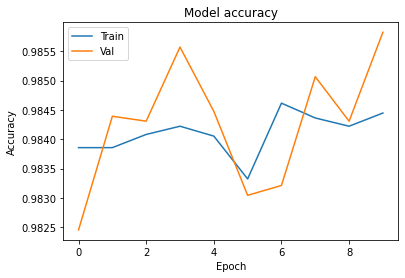

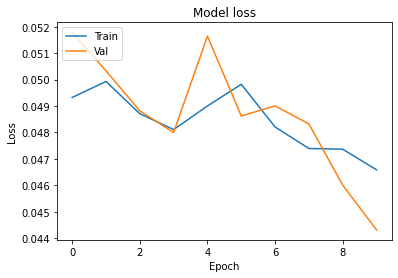

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

with tf.device('/device:GPU:0'):

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

    # Plot the training and validation accuracy over epochs
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.savefig('LE learning accuracy - nn.png')
    plt.show()

    # Plot the training and validation loss over epochs
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.savefig('LE learning loss - rnn.png')
    plt.show()

### ROC Curve

371/371 [==============================] - 0s 624us/step


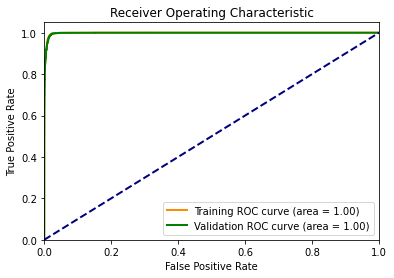

In [33]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, model.predict(X_train)[:,0])
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, model.predict(X_val)[:,0])

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_val, tpr_val, color='green', lw=2, label='Validation ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('LE roc - rnn.png')
plt.show()


### Precision Recall Curve

371/371 [==============================] - 0s 612us/step


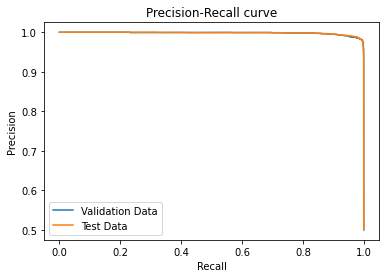

In [34]:
# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(df.drop('fraud', axis=1), df['fraud'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


# Make predictions on the validation data
y_val_pred = model.predict(X_val)[:, 0]

# Compute precision and recall values for validation data
precision_val, recall_val, thresholds_val = precision_recall_curve(y_val, y_val_pred)

# Plot the precision-recall curve for validation data
import matplotlib.pyplot as plt
plt.plot(recall_val, precision_val, label='Validation Data')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")

# Make predictions on the test data
y_pred = model.predict(X_test)[:, 0]

# Compute precision and recall values for test data
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_pred)

# Plot the precision-recall curve for test data
plt.plot(recall_test, precision_test, label='Test Data')
plt.legend(loc="lower left")
plt.savefig('LE precision - rnn.png')
plt.show()


### Calibration Curve

297/297 [==============================] - 0s 615us/step


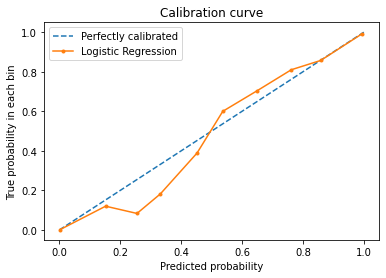

In [35]:
# Get the predicted probabilities
pred_probs = model.predict(X_val)[:, 0]

# Compute the calibration curve
true_prob, pred_prob = calibration_curve(y_val, pred_probs, n_bins=10)

# Visualize the calibration curve
plt.plot([0, 1], [0, 1], linestyle="--", label="Perfectly calibrated")
plt.plot(pred_prob, true_prob, marker=".", label="Logistic Regression")
plt.xlabel("Predicted probability")
plt.ylabel("True probability in each bin")
plt.title('Calibration curve')
plt.legend()
plt.savefig('LE calibration - rnn.png')
plt.show()


# NN

In [36]:
# Load the dataset
df = pd.read_csv('bank_fraud_dataset_label_encoding.csv')

print(df.columns)

Index(['customer', 'merchant', 'category', 'amount', 'fraud'], dtype='object')


In [37]:
from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping()
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=10, 
    min_delta=0.001, 
    mode='max'
)

In [38]:
import tensorflow as tf

with tf.device('/device:GPU:0'):
    # Split the data into training, validation, and testing sets
    X_train_val, X_test, y_train_val, y_test = train_test_split(df.drop('fraud', axis=1), df['fraud'], test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

    # Define the neural network model architecture
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Display the model summary
    model.summary()

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[custom_early_stopping])

    # Evaluate the performance of the model on the test data
    y_pred_test = model.predict(X_test).flatten()
    y_pred_test = np.where(y_pred_test > 0.5, 1, 0)

    print("For Test Dataset")
    print('Accuracy:', accuracy_score(y_test, y_pred_test))
    print('Precision:', precision_score(y_test, y_pred_test))
    print('Recall:', recall_score(y_test, y_pred_test))
    print('F1-score:', f1_score(y_test, y_pred_test))
    print('ROC-AUC:', roc_auc_score(y_test, y_pred_test))
    print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_test))
    print("Classification Report:\n", classification_report(y_test, y_pred_test))

    # Evaluate the performance of the model on the validation data
    y_pred_val = model.predict(X_val).flatten()
    y_pred_val = np.where(y_pred_val > 0.5, 1, 0)

    print("For Validation Dataset")
    print('Accuracy:', accuracy_score(y_val, y_pred_val))
    print('Precision:', precision_score(y_val, y_pred_val))
    print('Recall:', recall_score(y_val, y_pred_val))
    print('F1-score:', f1_score(y_val, y_pred_val))
    print('ROC-AUC:', roc_auc_score(y_val, y_pred_val))
    print('Confusion matrix:\n', confusion_matrix(y_val, y_pred_val))
    print("Classification Report:\n", classification_report(y_val, y_pred_val))

    # Evaluate the performance of the model
    nn_test_acc = accuracy_score(y_test, y_pred_test)
    nn_test_prec = precision_score(y_test, y_pred_test)
    nn_test_rec = recall_score(y_test, y_pred_test)
    nn_test_f1 = f1_score(y_test, y_pred_test)
    nn_test_roc = roc_auc_score(y_test, y_pred_test)

    nn_val_acc = accuracy_score(y_val, y_pred_val)
    nn_val_prec = precision_score(y_val, y_pred_val)
    nn_val_rec = recall_score(y_val, y_pred_val)
    nn_val_f1 = f1_score(y_val, y_pred_val)
    nn_val_roc = roc_auc_score(y_val, y_pred_val)

    with open('LE NN.txt', 'w') as f:
        print("\nNN Performance on Test Data:", file=f)
        print("Accuracy:", nn_test_acc, file=f)
        print("Precision:", nn_test_prec, file=f)
        print("Recall:", nn_test_rec, file=f)
        print("F1-score:", nn_test_f1, file=f)
        print("ROC-AUC:", nn_test_roc, file=f)

        print("\nNN Performance on Validation Data:", file=f)
        print("Accuracy:", nn_val_acc, file=f)
        print("Precision:", nn_val_prec, file=f)
        print("Recall:", nn_val_rec, file=f)
        print("F1-score:", nn_val_f1, file=f)
        print("ROC-AUC:", nn_val_roc, file=f)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                320       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1112/1112 [==============================] - 1s 866us/step - loss: 14.0793 - accuracy: 0.8042 - val_loss: 0.8192 - val_accuracy: 0.9296
Epoch 2/100
1112/1112 [==============================] - 1s 806us/step - loss: 0.5116 - accuracy: 0.8995 - val_loss: 0.2777 - val_accuracy: 0.9080
Epoch 3/100
1112/1112 [==

### Learning Curve

Epoch 1/10
1112/1112 [==============================] - 1s 693us/step - loss: 0.1923 - accuracy: 0.9296 - val_loss: 0.1888 - val_accuracy: 0.9323
Epoch 2/10
1112/1112 [==============================] - 1s 696us/step - loss: 0.1926 - accuracy: 0.9288 - val_loss: 0.1816 - val_accuracy: 0.9291
Epoch 3/10
1112/1112 [==============================] - 1s 703us/step - loss: 0.1887 - accuracy: 0.9294 - val_loss: 0.1822 - val_accuracy: 0.9322
Epoch 4/10
1112/1112 [==============================] - 1s 673us/step - loss: 0.1925 - accuracy: 0.9285 - val_loss: 0.1839 - val_accuracy: 0.9254
Epoch 5/10
1112/1112 [==============================] - 1s 646us/step - loss: 0.1924 - accuracy: 0.9294 - val_loss: 0.1942 - val_accuracy: 0.9296
Epoch 6/10
1112/1112 [==============================] - 1s 649us/step - loss: 0.1891 - accuracy: 0.9293 - val_loss: 0.1800 - val_accuracy: 0.9317
Epoch 7/10
1112/1112 [==============================] - 1s 687us/step - loss: 0.1922 - accuracy: 0.9291 - val_loss: 0.1780 -

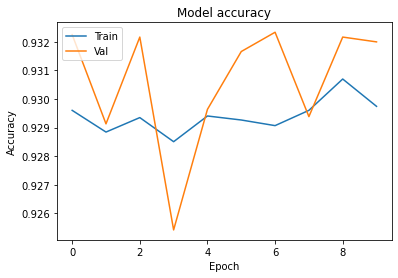

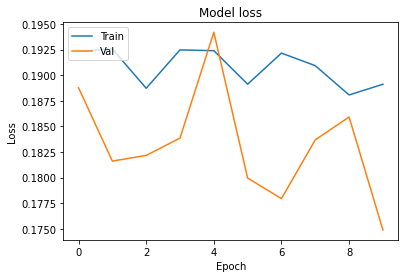

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

with tf.device('/device:GPU:0'):

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

    # Plot the training and validation accuracy over epochs
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.savefig('LE learning accuracy - nn.png')
    plt.show()

    # Plot the training and validation loss over epochs
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.savefig('LE learning loss - nn.png')
    plt.show()

### ROC Curve

371/371 [==============================] - 0s 352us/step


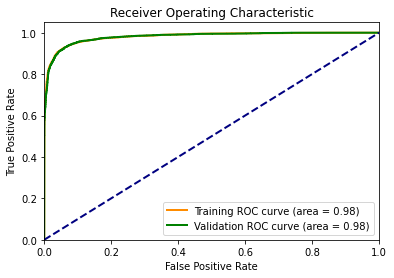

In [40]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, model.predict(X_train)[:,0])
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, model.predict(X_val)[:,0])

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_val, tpr_val, color='green', lw=2, label='Validation ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('LE roc - nn.png')
plt.show()


### Precision Recall Curve

371/371 [==============================] - 0s 363us/step


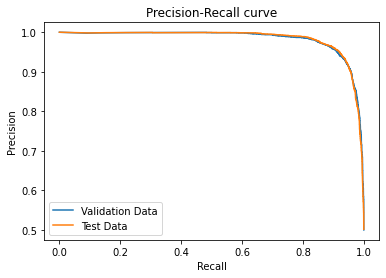

In [41]:
# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(df.drop('fraud', axis=1), df['fraud'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


# Make predictions on the validation data
y_val_pred = model.predict(X_val)[:, 0]

# Compute precision and recall values for validation data
precision_val, recall_val, thresholds_val = precision_recall_curve(y_val, y_val_pred)

# Plot the precision-recall curve for validation data
import matplotlib.pyplot as plt
plt.plot(recall_val, precision_val, label='Validation Data')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")

# Make predictions on the test data
y_pred = model.predict(X_test)[:, 0]

# Compute precision and recall values for test data
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_pred)

# Plot the precision-recall curve for test data
plt.plot(recall_test, precision_test, label='Test Data')
plt.legend(loc="lower left")
plt.savefig('LE precision - nn.png')
plt.show()


### Calibration Curve

297/297 [==============================] - 0s 354us/step


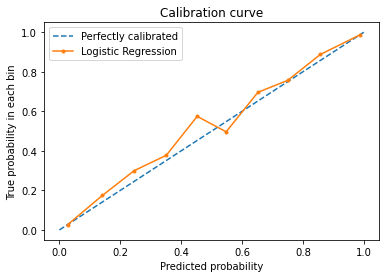

In [42]:
# Get the predicted probabilities
pred_probs = model.predict(X_val)[:, 0]

# Compute the calibration curve
true_prob, pred_prob = calibration_curve(y_val, pred_probs, n_bins=10)

# Visualize the calibration curve
plt.plot([0, 1], [0, 1], linestyle="--", label="Perfectly calibrated")
plt.plot(pred_prob, true_prob, marker=".", label="Logistic Regression")
plt.xlabel("Predicted probability")
plt.ylabel("True probability in each bin")
plt.title('Calibration curve')
plt.legend()
plt.savefig('LE calibration - nn.png')
plt.show()


# Logistic Regression

In [43]:
# Load the dataset
df = pd.read_csv('bank_fraud_dataset_label_encoding.csv')

print(df.columns)

Index(['customer', 'merchant', 'category', 'amount', 'fraud'], dtype='object')


In [44]:
from sklearn.linear_model import LogisticRegression

# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(df.drop('fraud', axis=1), df['fraud'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Create the grid search object
grid_search = GridSearchCV(
    LogisticRegression(solver='liblinear'),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the best accuracy
print('Best parameters:', grid_search.best_params_)
print('Best accuracy:', grid_search.best_score_)

# Train the logistic regression model with the best hyperparameters
best_model = LogisticRegression(solver='liblinear', **grid_search.best_params_)
best_model.fit(X_train, y_train)

# Make predictions on the test and validation data
y_pred_test = best_model.predict(X_test)
y_pred_val = best_model.predict(X_val)

# Evaluate the performance of the logistic regression model on the test and validation data
log_test_acc = accuracy_score(y_test, y_pred_test)
log_test_prec = precision_score(y_test, y_pred_test)
log_test_rec = recall_score(y_test, y_pred_test)
log_test_f1 = f1_score(y_test, y_pred_test)
log_test_roc = roc_auc_score(y_test, y_pred_test)

log_val_acc = accuracy_score(y_val, y_pred_val)
log_val_prec = precision_score(y_val, y_pred_val)
log_val_rec = recall_score(y_val, y_pred_val)
log_val_f1 = f1_score(y_val, y_pred_val)
log_val_roc = roc_auc_score(y_val, y_pred_val)

# Evaluate the performance of the gradient boosting classifier
print("For Test Dataset")
print('Accuracy:', log_test_acc)
print('Precision:', log_test_prec)
print('Recall:', log_test_rec)
print('F1-score:', log_test_f1)
print('ROC-AUC:', log_test_roc)
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

# Evaluate the performance of the gradient boosting classifier
print("For Validation Dataset")
print('Accuracy:', log_val_acc)
print('Precision:', log_val_prec)
print('Recall:', log_val_rec)
print('F1-score:', log_val_f1)
print('ROC-AUC:', log_val_roc)
print('Confusion matrix:\n', confusion_matrix(y_val, y_pred_val))
print("Classification Report:\n", classification_report(y_val, y_pred_val))

with open('LE Logistic Regression.txt', 'w') as f:
    print("\nLogistic Regression Performance on Test Data:", file=f)
    print("Accuracy:", log_test_acc, file=f)
    print("Precision:", log_test_prec, file=f)
    print("Recall:", log_test_rec, file=f)
    print("F1-score:", log_test_f1, file=f)
    print("ROC-AUC:", log_test_roc, file=f)

    print("\nLogistic Regression Performance on Validation Data:", file=f)
    print("Accuracy:", log_val_acc, file=f)
    print("Precision:", log_val_prec, file=f)
    print("Recall:", log_val_rec, file=f)
    print("F1-score:", log_val_f1, file=f)
    print("ROC-AUC:", log_val_roc, file=f)

Best parameters: {'C': 1, 'penalty': 'l1'}
Best accuracy: 0.9278885087332022
For Test Dataset
Accuracy: 0.9276976292921624
Precision: 0.9518821022727273
Recall: 0.9014629224819236
F1-score: 0.9259867000604544
ROC-AUC: 0.9277886911766204
Confusion matrix:
 [[5635  271]
 [ 586 5361]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      5906
           1       0.95      0.90      0.93      5947

    accuracy                           0.93     11853
   macro avg       0.93      0.93      0.93     11853
weighted avg       0.93      0.93      0.93     11853

For Validation Dataset
Accuracy: 0.9264321268877077
Precision: 0.9507933678017472
Recall: 0.899477146230393
F1-score: 0.9244236436124112
ROC-AUC: 0.9264435022171547
Confusion matrix:
 [[5648  276]
 [ 596 5333]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93      5924
           1       0.9

### Learning Curve

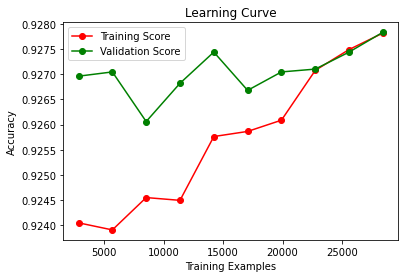

In [45]:
# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Validation Score')
plt.legend(loc='best')
plt.savefig('LE learning - log.png')


### ROC Curve

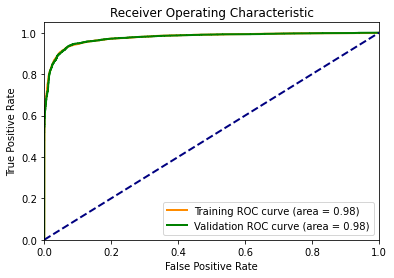

In [46]:
# Plot the ROC curves for the training and validation sets
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, best_model.predict_proba(X_train)[:,1])
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, best_model.predict_proba(X_val)[:,1])

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_val, tpr_val, color='green', lw=2, label='Validation ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('LE roc - log.png')
plt.show()


### Precision Recall Curve

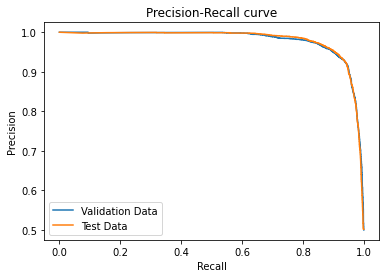

In [47]:
# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(df.drop('fraud', axis=1), df['fraud'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred = model.predict_proba(X_val)[:, 1]

# Compute precision and recall values for validation data
precision_val, recall_val, thresholds_val = precision_recall_curve(y_val, y_val_pred)

# Plot the precision-recall curve for validation data
import matplotlib.pyplot as plt
plt.plot(recall_val, precision_val, label='Validation Data')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")

# Make predictions on the test data
y_pred = model.predict_proba(X_test)[:, 1]

# Compute precision and recall values for test data
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_pred)

# Plot the precision-recall curve for test data
plt.plot(recall_test, precision_test, label='Test Data')
plt.legend(loc="lower left")
plt.savefig('LE precission - log.png')
plt.show()


### Calibration Curve

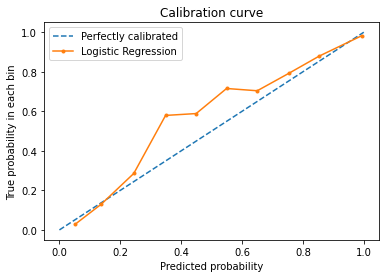

In [48]:
# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get the predicted probabilities
pred_probs = model.predict_proba(X_val)[:, 1]

# Compute the calibration curve
true_prob, pred_prob = calibration_curve(y_val, pred_probs, n_bins=10)

# Visualize the calibration curve
plt.plot([0, 1], [0, 1], linestyle="--", label="Perfectly calibrated")
plt.plot(pred_prob, true_prob, marker=".", label="Logistic Regression")
plt.xlabel("Predicted probability")
plt.ylabel("True probability in each bin")
plt.title('Calibration curve')
plt.legend()
plt.savefig('LE calibration - log.png')
plt.show()


# Gradient Boosting

In [49]:
import pandas as pd
# Load the dataset
df = pd.read_csv('bank_fraud_dataset_label_encoding.csv')

print(df.columns)


Index(['customer', 'merchant', 'category', 'amount', 'fraud'], dtype='object')


In [50]:
from sklearn.ensemble import GradientBoostingClassifier

# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(df.drop('fraud', axis=1), df['fraud'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.05, 0.1, 0.2]
}

# Create the grid search object
grid_search = GridSearchCV(
    GradientBoostingClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the best accuracy
print('Best parameters:', grid_search.best_params_)
print('Best accuracy:', grid_search.best_score_)

# Train the gradient boosting classifier with the best hyperparameters
best_model = GradientBoostingClassifier(**grid_search.best_params_)
best_model.fit(X_train, y_train)

# Make predictions on the test and validation data
y_pred_test = best_model.predict(X_test)
y_pred_val = best_model.predict(X_val)

# Evaluate the performance of the logistic regression model on the test and validation data
gb_test_acc = accuracy_score(y_test, y_pred_test)
gb_test_prec = precision_score(y_test, y_pred_test)
gb_test_rec = recall_score(y_test, y_pred_test)
gb_test_f1 = f1_score(y_test, y_pred_test)
gb_test_roc = roc_auc_score(y_test, y_pred_test)

gb_val_acc = accuracy_score(y_val, y_pred_val)
gb_val_prec = precision_score(y_val, y_pred_val)
gb_val_rec = recall_score(y_val, y_pred_val)
gb_val_f1 = f1_score(y_val, y_pred_val)
gb_val_roc = roc_auc_score(y_val, y_pred_val)

# Evaluate the performance of the gradient boosting classifier
print("For Test Dataset")
print('Accuracy:', gb_test_acc)
print('Precision:', gb_test_prec)
print('Recall:', gb_test_rec)
print('F1-score:', gb_test_f1)
print('ROC-AUC:', gb_test_roc)
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

# Evaluate the performance of the gradient boosting classifier
print("For Validation Dataset")
print('Accuracy:', gb_val_acc)
print('Precision:', gb_val_prec)
print('Recall:', gb_val_rec)
print('F1-score:', gb_val_f1)
print('ROC-AUC:', gb_val_roc)
print('Confusion matrix:\n', confusion_matrix(y_val, y_pred_val))
print("Classification Report:\n", classification_report(y_val, y_pred_val))

with open('LE Gradient Boosting.txt', 'w') as f:
    print("\nGradient Boosting Performance on Test Data:", file=f)
    print("Accuracy:", gb_test_acc, file=f)
    print("Precision:", gb_test_prec, file=f)
    print("Recall:", gb_test_rec, file=f)
    print("F1-score:", gb_test_f1, file=f)
    print("ROC-AUC:", gb_test_roc, file=f)

    print("\nGradient Boosting Pegbormance on Validation Data:", file=f)
    print("Accuracy:", gb_val_acc, file=f)
    print("Precision:", gb_val_prec, file=f)
    print("Recall:", gb_val_rec, file=f)
    print("F1-score:", gb_val_f1, file=f)
    print("ROC-AUC:", gb_val_roc, file=f)

Best parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}
Best accuracy: 0.9918438558806925
For Test Dataset
Accuracy: 0.9937568548046908
Precision: 0.9906432748538012
Recall: 0.9969732638305028
F1-score: 0.9937981897418706
ROC-AUC: 0.9937456904997418
Confusion matrix:
 [[5850   56]
 [  18 5929]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      5906
           1       0.99      1.00      0.99      5947

    accuracy                           0.99     11853
   macro avg       0.99      0.99      0.99     11853
weighted avg       0.99      0.99      0.99     11853

For Validation Dataset
Accuracy: 0.9925757192271999
Precision: 0.9891140512476972
Recall: 0.9961207623545286
F1-score: 0.9926050420168069
ROC-AUC: 0.9925742231759139
Confusion matrix:
 [[5859   65]
 [  23 5906]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.

### Learning Curve

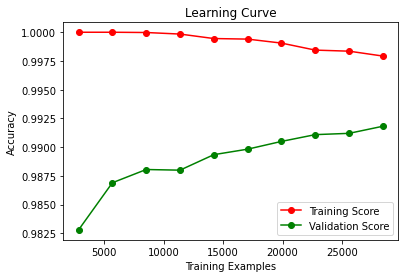

In [51]:
# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Validation Score')
plt.legend(loc='best')
plt.savefig('LE learning - gb.png')

### ROC Curve

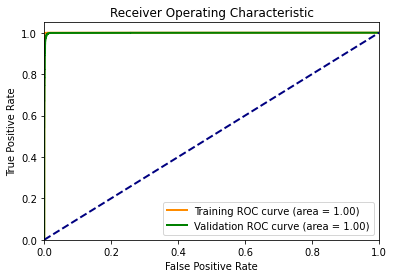

In [52]:
# Fit the Gradient Boosting classifier
model = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)
model.fit(X_train, y_train)

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, best_model.predict_proba(X_train)[:,1])
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, best_model.predict_proba(X_val)[:,1])

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_val, tpr_val, color='green', lw=2, label='Validation ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('LE roc - gb.png')
plt.show()


### Precision Recall Curve

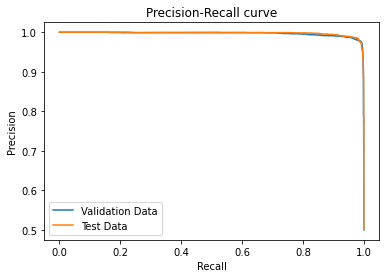

In [53]:
# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(df.drop('fraud', axis=1), df['fraud'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Fit the logistic regression model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred = model.predict_proba(X_val)[:, 1]

# Compute precision and recall values for validation data
precision_val, recall_val, thresholds_val = precision_recall_curve(y_val, y_val_pred)

# Plot the precision-recall curve for validation data
import matplotlib.pyplot as plt
plt.plot(recall_val, precision_val, label='Validation Data')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")

# Make predictions on the test data
y_pred = model.predict_proba(X_test)[:, 1]

# Compute precision and recall values for test data
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_pred)

# Plot the precision-recall curve for test data
plt.plot(recall_test, precision_test, label='Test Data')
plt.legend(loc="lower left")
plt.savefig('LE precision - gb.png')
plt.show()


### Calibration Curve

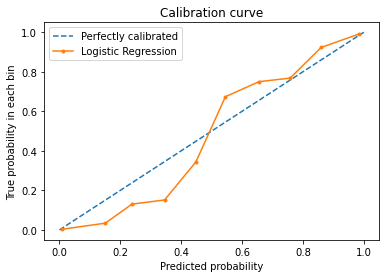

In [54]:
# Fit the Gradient Boosting model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Get the predicted probabilities
pred_probs = model.predict_proba(X_val)[:, 1]

# Compute the calibration curve
true_prob, pred_prob = calibration_curve(y_val, pred_probs, n_bins=10)

# Visualize the calibration curve
plt.plot([0, 1], [0, 1], linestyle="--", label="Perfectly calibrated")
plt.plot(pred_prob, true_prob, marker=".", label="Logistic Regression")
plt.xlabel("Predicted probability")
plt.ylabel("True probability in each bin")
plt.title('Calibration curve')
plt.legend()
plt.savefig('LE calibration - gb.png')
plt.show()


# Random Forest

In [55]:
# Load the dataset
df = pd.read_csv('bank_fraud_dataset_label_encoding.csv')

print(df.columns)


Index(['customer', 'merchant', 'category', 'amount', 'fraud'], dtype='object')


In [56]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(df.drop('fraud', axis=1), df['fraud'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the best accuracy
print('Best parameters:', grid_search.best_params_)
print('Best accuracy:', grid_search.best_score_)

# Train the random forest model with the best hyperparameters
best_model = RandomForestClassifier(random_state=42, **grid_search.best_params_)
best_model.fit(X_train, y_train)

# Make predictions on the test and validation data
y_pred_test = best_model.predict(X_test)
y_pred_val = best_model.predict(X_val)

# Evaluate the performance of the logistic regression model on the test and validation data
rf_test_acc = accuracy_score(y_test, y_pred_test)
rf_test_prec = precision_score(y_test, y_pred_test)
rf_test_rec = recall_score(y_test, y_pred_test)
rf_test_f1 = f1_score(y_test, y_pred_test)
rf_test_roc = roc_auc_score(y_test, y_pred_test)

rf_val_acc = accuracy_score(y_val, y_pred_val)
rf_val_prec = precision_score(y_val, y_pred_val)
rf_val_rec = recall_score(y_val, y_pred_val)
rf_val_f1 = f1_score(y_val, y_pred_val)
rf_val_roc = roc_auc_score(y_val, y_pred_val)

# Evaluate the performance of the gradient boosting classifier
print("For Test Dataset")
print('Accuracy:', rf_test_acc)
print('Precision:', rf_test_prec)
print('Recall:', rf_test_rec)
print('F1-score:', rf_test_f1)
print('ROC-AUC:', rf_test_roc)
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

# Evaluate the performance of the gradient boosting classifier
print("For Validation Dataset")
print('Accuracy:', rf_val_acc)
print('Precision:', rf_val_prec)
print('Recall:', rf_val_rec)
print('F1-score:', rf_val_f1)
print('ROC-AUC:', rf_val_roc)
print('Confusion matrix:\n', confusion_matrix(y_val, y_pred_val))
print("Classification Report:\n", classification_report(y_val, y_pred_val))

with open('LE Random Forest.txt', 'w') as f:
    print("\nRandom Forest Performance on Test Data:", file=f)
    print("Accuracy:", rf_test_acc, file=f)
    print("Precision:", rf_test_prec, file=f)
    print("Recall:", rf_test_rec, file=f)
    print("F1-score:", rf_test_f1, file=f)
    print("ROC-AUC:", rf_test_roc, file=f)

    print("\nRandom Forest Performance on Validation Data:", file=f)
    print("Accuracy:", rf_val_acc, file=f)
    print("Precision:", rf_val_prec, file=f)
    print("Recall:", rf_val_rec, file=f)
    print("F1-score:", rf_val_f1, file=f)
    print("ROC-AUC:", rf_val_roc, file=f)


Best parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy: 0.9825628049130618
For Test Dataset
Accuracy: 0.9859107398970725
Precision: 0.976897689768977
Recall: 0.9954598957457541
F1-score: 0.9860914466561173
ROC-AUC: 0.9858775943341029
Confusion matrix:
 [[5766  140]
 [  27 5920]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      5906
           1       0.98      1.00      0.99      5947

    accuracy                           0.99     11853
   macro avg       0.99      0.99      0.99     11853
weighted avg       0.99      0.99      0.99     11853

For Validation Dataset
Accuracy: 0.9846452374926179
Precision: 0.9736278226471073
Recall: 0.9962894248608535
F1-score: 0.9848282760920307
ROC-AUC: 0.9846403235040256
Confusion matrix:
 [[5764  160]
 [  22 5907]]
Classification Report:
               precision    recall  f1-score   support

           0     

### Learning Curve

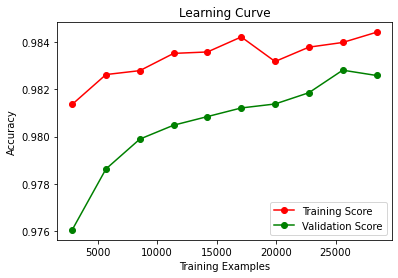

In [57]:
# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Validation Score')
plt.legend(loc='best')
plt.savefig('LE learning - rf.png')

### ROC Curve

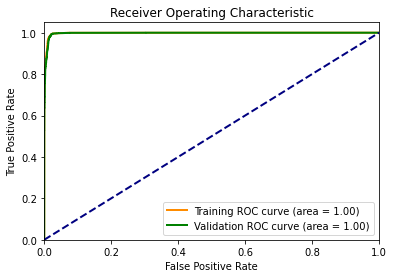

In [58]:
# Fit the random forest classifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, best_model.predict_proba(X_train)[:,1])
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, best_model.predict_proba(X_val)[:,1])

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_val, tpr_val, color='green', lw=2, label='Validation ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('LE roc - rf.png')
plt.show()


### Precision Recall

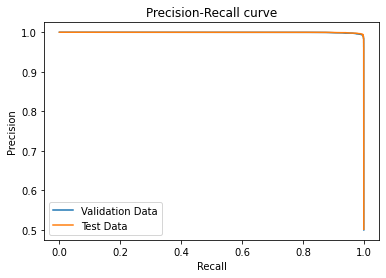

In [59]:
# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(df.drop('fraud', axis=1), df['fraud'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Fit the logistic regression model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred = model.predict_proba(X_val)[:, 1]

# Compute precision and recall values for validation data
precision_val, recall_val, thresholds_val = precision_recall_curve(y_val, y_val_pred)

# Plot the precision-recall curve for validation data
import matplotlib.pyplot as plt
plt.plot(recall_val, precision_val, label='Validation Data')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")

# Make predictions on the test data
y_pred = model.predict_proba(X_test)[:, 1]

# Compute precision and recall values for test data
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_pred)

# Plot the precision-recall curve for test data
plt.plot(recall_test, precision_test, label='Test Data')
plt.legend(loc="lower left")
plt.savefig('LE precision - rf.png')
plt.show()


### Calibration Curve

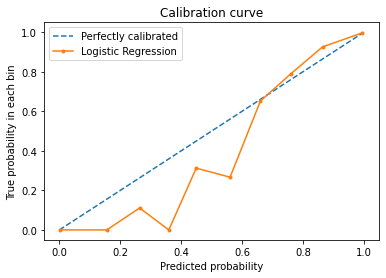

In [60]:
# Fit the Gradient Boosting model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get the predicted probabilities
pred_probs = model.predict_proba(X_val)[:, 1]

# Compute the calibration curve
true_prob, pred_prob = calibration_curve(y_val, pred_probs, n_bins=10)

# Visualize the calibration curve
plt.plot([0, 1], [0, 1], linestyle="--", label="Perfectly calibrated")
plt.plot(pred_prob, true_prob, marker=".", label="Logistic Regression")
plt.xlabel("Predicted probability")
plt.ylabel("True probability in each bin")
plt.title('Calibration curve')
plt.legend()
plt.savefig('LE calibration - rf.png')
plt.show()


# Analysis

### Wilcoxon Test

In [61]:
from scipy.stats import wilcoxon
import numpy as np

# Two arrays of sample data
algorithm1_scores = [rnn_test_acc, rnn_test_prec, rnn_test_rec, rnn_test_f1, rnn_test_roc]
algorithm2_scores = [nn_test_acc, nn_test_prec, nn_test_rec, nn_test_f1, nn_test_roc]
algorithm3_scores = [log_test_acc, log_test_prec, log_test_rec, log_test_f1, log_test_roc]
algorithm4_scores = [gb_test_acc, gb_test_prec, gb_test_rec, gb_test_f1, gb_test_roc]
algorithm5_scores = [rf_test_acc, rf_test_prec, rf_test_rec, rf_test_f1, rf_test_roc]

# Perform the Wilcoxon signed-rank test for each pair of algorithms
results = []
for i in range(1, 6):
    for j in range(i+1, 6):
        statistic, p_value = wilcoxon(eval(f"algorithm{i}_scores"), eval(f"algorithm{j}_scores"), zero_method='zsplit')
        result = f"Test statistic for algorithms {i} and {j}: {statistic}\n"
        result += f"P-value for algorithms {i} and {j}: {p_value}\n"
        print(f"Test statistic for algorithms {i} and {j}:", statistic)
        print(f"P-value for algorithms {i} and {j}:", p_value)
        if p_value < 0.05:
            result += f"There is a significant difference between algorithms {i} and {j}.\n"
            print(f"There is a significant difference between algorithms {i} and {j}.\n")
        else:
            result += f"There is no significant difference between algorithms {i} and {j}.\n"
            print(f"There is no significant difference between algorithms {i} and {j}.\n")
        results.append(result)

# Save the output to a text file
with open('LE wilcox_test_results.txt', 'w') as f:
    f.write("Results of Wilcoxon signed-rank tests:\n\n")
    f.writelines(results)


Test statistic for algorithms 1 and 2: 0.0
P-value for algorithms 1 and 2: 0.0625
There is no significant difference between algorithms 1 and 2.

Test statistic for algorithms 1 and 3: 0.0
P-value for algorithms 1 and 3: 0.0625
There is no significant difference between algorithms 1 and 3.

Test statistic for algorithms 1 and 4: 0.0
P-value for algorithms 1 and 4: 0.0625
There is no significant difference between algorithms 1 and 4.

Test statistic for algorithms 1 and 5: 0.0
P-value for algorithms 1 and 5: 0.0625
There is no significant difference between algorithms 1 and 5.

Test statistic for algorithms 2 and 3: 4.0
P-value for algorithms 2 and 3: 0.4375
There is no significant difference between algorithms 2 and 3.

Test statistic for algorithms 2 and 4: 0.0
P-value for algorithms 2 and 4: 0.0625
There is no significant difference between algorithms 2 and 4.

Test statistic for algorithms 2 and 5: 0.0
P-value for algorithms 2 and 5: 0.0625
There is no significant difference between

### Statistical Analysis of all the accuracies

In [62]:
from scipy import stats
import numpy as np

# Create a list of classifiers and their corresponding performance metrics
classifiers = ['RNN', 'NN', 'Logistic Regression', 'Gradient Boosting', 'Random Forest']
accuracies = [rnn_test_acc, nn_test_acc, log_test_acc, gb_test_acc, rf_test_acc]

# Calculate the mean and standard deviation of the accuracies
mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)

# Calculate the t-statistic and p-value
t_stat, p_val = stats.ttest_1samp(accuracies, 0.5)

# Print the results
print("Mean accuracy: {:.4f}".format(mean_acc))
print("Standard deviation: {:.4f}".format(std_acc))
print("T-statistic: {:.4f}".format(t_stat))
print("P-value: {:.4f}".format(p_val))

# Save the output to a text file
with open('LE classifier_metrics.txt', 'w') as f:
    f.write("Mean accuracy: {:.4f}\n".format(mean_acc))
    f.write("Standard deviation: {:.4f}\n".format(std_acc))
    f.write("T-statistic: {:.4f}\n".format(t_stat))
    f.write("P-value: {:.4f}\n".format(p_val))


Mean accuracy: 0.9649
Standard deviation: 0.0282
T-statistic: 33.0037
P-value: 0.0000


### Friedman Chi Square Test

In [63]:
from scipy.stats import friedmanchisquare

# define the performance metrics for comparison
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# create a dictionary to store the results
results = {}
for metric in metrics:
    results[metric] = []

# append the performance of each algorithm for each metric
results['accuracy'].append(rnn_test_acc)
results['precision'].append(rnn_test_prec)
results['recall'].append(rnn_test_rec)
results['f1'].append(rnn_test_f1)
results['roc_auc'].append(rnn_test_roc)

results['accuracy'].append(nn_test_acc)
results['precision'].append(nn_test_prec)
results['recall'].append(nn_test_rec)
results['f1'].append(nn_test_f1)
results['roc_auc'].append(nn_test_roc)

results['accuracy'].append(log_test_acc)
results['precision'].append(log_test_prec)
results['recall'].append(log_test_rec)
results['f1'].append(log_test_f1)
results['roc_auc'].append(log_test_roc)

results['accuracy'].append(gb_test_acc)
results['precision'].append(gb_test_prec)
results['recall'].append(gb_test_rec)
results['f1'].append(gb_test_f1)
results['roc_auc'].append(gb_test_roc)

results['accuracy'].append(rf_test_acc)
results['precision'].append(rf_test_prec)
results['recall'].append(rf_test_rec)
results['f1'].append(rf_test_f1)
results['roc_auc'].append(rf_test_roc)

# perform Friedman test
stat, p = friedmanchisquare(*results.values())

print('Friedman Test:')
print(f'Test statistic: {stat:.4f}')
print(f'p-value: {p:.4f}')
if p < 0.05:
    print('There is a significant difference between the algorithms.')
else:
    print('There is no significant difference between the algorithms.')


# Save output to a text file
with open('LE friedman_test_results.txt', 'w') as f:
    f.write('Friedman Test:\n')
    f.write(f'Test statistic: {stat:.4f}\n')
    f.write(f'p-value: {p:.4f}\n')
    if p < 0.05:
        f.write('There is a significant difference between the algorithms.\n')
    else:
        f.write('There is no significant difference between the algorithms.\n')


Friedman Test:
Test statistic: 0.8000
p-value: 0.9384
There is no significant difference between the algorithms.


### Displaying the metrics for all the algorithms

In [64]:
# Create a dictionary to store the accuracies of each model
models_acc = {"Logistic Regression": log_test_acc,
              "Gradient Boosting": gb_test_acc,
              "Random Forest": rf_test_acc,
              "RNN": rnn_test_acc,
              "NN": nn_test_acc}

# Convert the dictionary into a Pandas DataFrame
df_acc = pd.DataFrame.from_dict(models_acc, orient='index')
print()
print()
print("Accuracies")
print(df_acc)

# Create a dictionary to store the precision of each model
models_prec = {"Logistic Regression": log_test_prec,
              "Gradient Boosting": gb_test_prec,
              "Random Forest": rf_test_prec,
              "RNN": rnn_test_prec,
              "NN": nn_test_prec}

# Convert the dictionary into a Pandas DataFrame
df_prec = pd.DataFrame.from_dict(models_prec, orient='index')
print()
print()
print("Precision")
print(df_prec)

# Create a dictionary to store the recall of each model
models_rec = {"Logistic Regression": log_test_rec,
              "Gradient Boosting": gb_test_rec,
              "Random Forest": rf_test_rec,
              "RNN": rnn_test_rec,
              "NN": nn_test_rec}

# Convert the dictionary into a Pandas DataFrame
df_rec = pd.DataFrame.from_dict(models_rec, orient='index')
print()
print()
print("Recall")
print(df_rec)

# Create a dictionary to store the f1 of each model
models_f1 = {"Logistic Regression": log_test_f1,
              "Gradient Boosting": gb_test_f1,
              "Random Forest": rf_test_f1,
              "RNN": rnn_test_f1,
              "NN": nn_test_f1}

# Convert the dictionary into a Pandas DataFrame
df_f1 = pd.DataFrame.from_dict(models_f1, orient='index')
print()
print()
print("f1")
print(df_f1)

# Create a dictionary to store the ROC of each model
models_roc = {"Logistic Regression": log_test_roc,
              "Gradient Boosting": gb_test_roc,
              "Random Forest": rf_test_roc,
              "RNN": rnn_test_roc,
              "NN": nn_test_roc}

# Convert the dictionary into a Pandas DataFrame
df_roc = pd.DataFrame.from_dict(models_roc, orient='index')
print()
print()
print("ROC")
print(df_roc)

with open('LE Metrics.txt', 'w') as f:
    print("Accuracies", file=f)
    print(df_acc, file=f)
    
    print("Precision", file=f)
    print(df_prec, file=f)
    
    print("Recall", file=f)
    print(df_rec, file=f)
    
    print("f1", file=f)
    print(df_f1, file=f)
    
    print("ROC", file=f)
    print(df_roc, file=f)




Accuracies
                            0
Logistic Regression  0.927698
Gradient Boosting    0.993757
Random Forest        0.985911
RNN                  0.983211
NN                   0.933688


Precision
                            0
Logistic Regression  0.951882
Gradient Boosting    0.990643
Random Forest        0.976898
RNN                  0.972231
NN                   0.942852


Recall
                            0
Logistic Regression  0.901463
Gradient Boosting    0.996973
Random Forest        0.995460
RNN                  0.994955
NN                   0.923827


f1
                            0
Logistic Regression  0.925987
Gradient Boosting    0.993798
Random Forest        0.986091
RNN                  0.983462
NN                   0.933243


ROC
                            0
Logistic Regression  0.927789
Gradient Boosting    0.993746
Random Forest        0.985878
RNN                  0.983170
NN                   0.933722


### Plotting the metrics for each algorithm

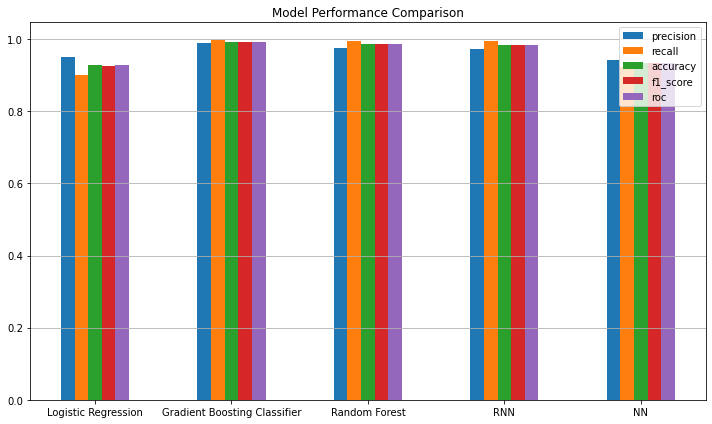

In [65]:
# Define model names and performance metrics
models = {
    'Logistic Regression': {'precision': log_test_prec, 'recall': log_test_rec, 'accuracy': log_test_acc, 'f1_score': log_test_f1, 'roc': log_test_roc},
    'Gradient Boosting Classifier': {'precision': gb_test_prec, 'recall': gb_test_rec, 'accuracy': gb_test_acc, 'f1_score': gb_test_f1, 'roc': gb_test_roc},
    'Random Forest': {'precision': rf_test_prec, 'recall': rf_test_rec, 'accuracy': rf_test_acc, 'f1_score': rf_test_f1, 'roc': rf_test_roc},
    'RNN': {'precision': rnn_test_prec, 'recall': rnn_test_rec, 'accuracy': rnn_test_acc, 'f1_score': rnn_test_f1, 'roc': rnn_test_roc},
    'NN': {'precision': nn_test_prec, 'recall': nn_test_rec, 'accuracy': nn_test_acc, 'f1_score': nn_test_f1, 'roc': nn_test_roc}
}

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.1
x_pos = np.arange(len(models))
metrics = list(models['Logistic Regression'].keys())

for i, metric in enumerate(metrics):
    values = [model[metric] for model in models.values()]
    ax.bar(x_pos + (i - 2) * width, values, width, label=metric)

ax.set_xticks(x_pos)
ax.set_xticklabels(models.keys())
ax.legend()
ax.yaxis.grid(True)
ax.set_title('Model Performance Comparison')
plt.tight_layout()
plt.savefig("LE Performance Comparison.png")
plt.show()


### Comparing the models against each metric

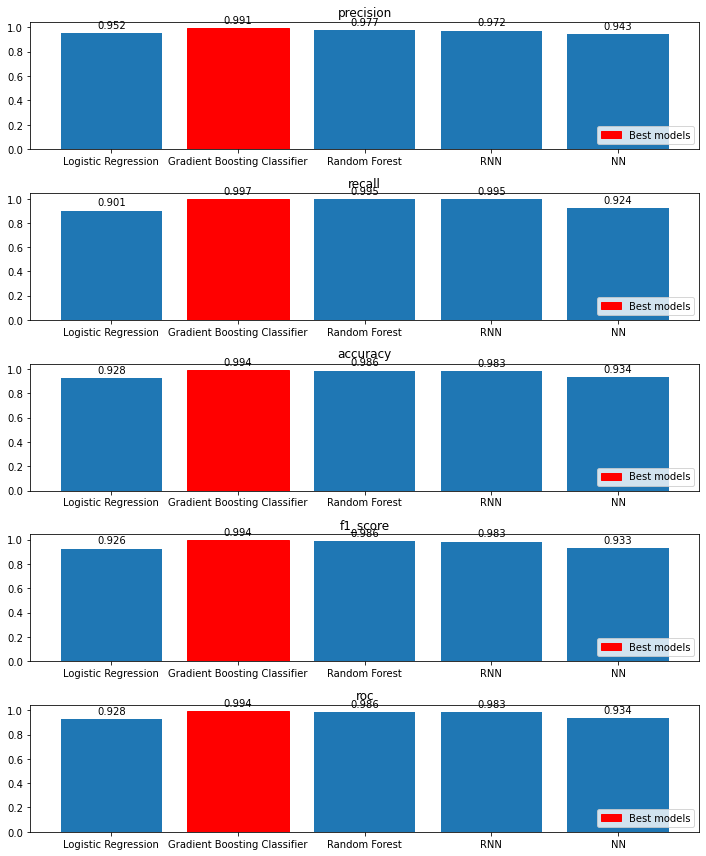

In [66]:
# Define model names and performance metrics
models = {
    'Logistic Regression': {'precision': log_test_prec, 'recall': log_test_rec, 'accuracy': log_test_acc, 'f1_score': log_test_f1, 'roc': log_test_roc},
    'Gradient Boosting Classifier': {'precision': gb_test_prec, 'recall': gb_test_rec, 'accuracy': gb_test_acc, 'f1_score': gb_test_f1, 'roc': gb_test_roc},
    'Random Forest': {'precision': rf_test_prec, 'recall': rf_test_rec, 'accuracy': rf_test_acc, 'f1_score': rf_test_f1, 'roc': rf_test_roc},
    'RNN': {'precision': rnn_test_prec, 'recall': rnn_test_rec, 'accuracy': rnn_test_acc, 'f1_score': rnn_test_f1, 'roc': rnn_test_roc},
    'NN': {'precision': nn_test_prec, 'recall': nn_test_rec, 'accuracy': nn_test_acc, 'f1_score': nn_test_f1, 'roc': nn_test_roc}
}

# Create subplots for each metric
metrics = list(models['Logistic Regression'].keys())
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(10, 12))

# Plot each metric
for i, metric in enumerate(metrics):
    values = [model[metric] for model in models.values()]
    rects = axes[i].bar(models.keys(), values)
    axes[i].set_title(metric)

    # Highlight tallest bars
    max_val = max(values)
    max_indices = [index for index, value in enumerate(values) if value == max_val]
    for index in max_indices:
        rects[index].set_color('red')

    # Add legend
    axes[i].legend(tuple(rects[index] for index in max_indices), ('Best models',), loc='lower right')

    # Add value annotations
    for rect in rects:
        height = rect.get_height()
        axes[i].annotate(f'{height:.3f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.savefig("LE Best Model.png")
plt.show()
